# Fashion Boutique Dataset: Exploratory Data Analysis (EDA)

This Jupyter Notebook performs an Exploratory Data Analysis (EDA) on the Fashion Boutique Dataset. The dataset contains information about fashion products, including categories, brands, prices, purchase dates, stock quantities, customer ratings, and return details. It appears to be a synthetic or sample dataset for a boutique, with 2,000+ entries across various columns like Product_ID, Category, Current_Price, etc.

The goal of this EDA is to uncover insights into revenue trends, pricing, seasonal patterns, returns, and correlations. We'll use Python libraries (Pandas for data manipulation, Matplotlib and Seaborn for static visualizations, and Plotly for interactive ones) to generate at least five visualizations, along with meaningful insights tailored to a context like Bhubaneswar, Odisha (tropical climate with monsoons influencing fashion sales).

### Notebook Structure:

* Dataset Overview

* Data Loading and Initial Inspection

* Data Preprocessing

* Visualizations and Insights

* Overall Summary and Recommendations

## Dataset Overview

### Description
* **Source**: The dataset is provided as an Excel file (Fashion_Boutique_Dataset - Copy.xlsx) with a main sheet 'Fashion_Data'. It includes product details for a fashion boutique.

* **Key Columns**:

    *   **Product_ID**: Unique identifier for each product.
  
    *   **Category**: Product type (e.g., Tops, Bottoms, Outerwear, Shoes, Dresses, Accessories).

    *   **Brand**: Brand name (e.g., Zara, Uniqlo, H&M).

    *   **Season**: Season the product is suited for (Spring, Summer, Fall, Winter).

    *   **Original_Price and Current_Price**: Pricing details, with Markdown_Percentage indicating discounts.

    *   **Purchase_Date**: Date of purchase.

    *   **Stock_Quantity**: Available stock.

    *   **Customer_Rating**: Rating out of 5 (some missing).

    *   **is_returned and Return_Reason**: Return status and reason (e.g., Size Issue, Quality Issue).

* **Size**: Approximately 2,000 rows (products).

* **Potential Issues**: Missing values in Customer_Rating, Size for some categories, and empty Return_Reason for non-returns.

* **Context**: Insights are localized to Bhubaneswar, Odisha, where hot/humid weather favors lighter clothing, and monsoons (June-September) might boost indoor/seasonal sales.

### Objectives of EDA
* Analyze revenue by category and time.

* Explore price distributions and discounts.

* Identify return patterns and correlations.

* Provide actionable insights for inventory, pricing, and customer satisfaction.



# Data Loading and Initial Inspection
## Code: Loading the Dataset
We load the data using Pandas' read_excel function. Use a raw string (r"...") for Windows paths to avoid escape sequence errors.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load dataset (replace with your actual file path; raw string to avoid errors)
df = pd.read_excel(r"C:\Users\KIIT0001\Downloads\Fashion_Boutique_Dataset.xlsx", sheet_name='Fashion_Data')

## Code: Basic Inspection
Display the first few rows, summary statistics, and missing values.

In [33]:
# Display first few rows
print("First Few Rows of the Dataset:")
print(df.head())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

First Few Rows of the Dataset:
  Product_ID     Category            Brand  Season Size  Color  \
0   FB000001    Outerwear             Zara  Spring   XL    Red   
1   FB000002         Tops           Uniqlo  Winter    L   Pink   
2   FB000003  Accessories           Uniqlo  Winter  NaN  Black   
3   FB000004        Shoes           Uniqlo  Spring   XL  Black   
4   FB000005         Tops  Banana Republic  Winter   XL  Black   

   Original_Price  Markdown_Percentage  Current_Price Purchase_Date  \
0          196.01                  0.0         196.01    2025-07-05   
1          119.64                  0.0         119.64    2025-08-06   
2           33.80                  0.0          33.80    2025-08-06   
3           75.36                  0.0          75.36    2025-07-07   
4          105.02                  0.0         105.02    2025-08-06   

   Stock_Quantity  Customer_Rating  is_returned Return_Reason  
0              37              3.0        False           NaN  
1               2

## Explanation
* **df.head()**: Shows a sample of the data for quick review.

* **df.describe()**: Provides mean, min, max, etc., for numerical columns like prices and ratings.

* **df.isnull().sum()**: Identifies columns with missing data (e.g., Customer_Rating may need filling with 0 or mean for analysis).

# Data Preprocessing
## Code: Preprocessing Steps
Convert dates and handle any necessary cleaning (e.g., for time-based analysis).

In [34]:
# Convert 'Purchase_Date' to datetime
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])

# SAFER: fill missing ratings
df['Customer_Rating'] = df['Customer_Rating'].fillna(0)

# Create a 'Month' column
df['Month'] = df['Purchase_Date'].dt.to_period('M').astype(str)

## Explanation
* Date conversion ensures we can group by months or quarters.

* Missing values: Filled with 0 for simplicity; in a real scenario, use imputation techniques like mean or median.

* This prepares the data for visualizations without altering the original dataset significantly.



# Visualizations and Insights
Here, we create six visualizations using **Matplotlib, Seaborn, and Plotly**. Each includes code, the plot, and insights.

### Visualization 1: Bar Chart of Total Revenue by Category (Matplotlib)
This bar chart shows summed **Current_Price per Category**.

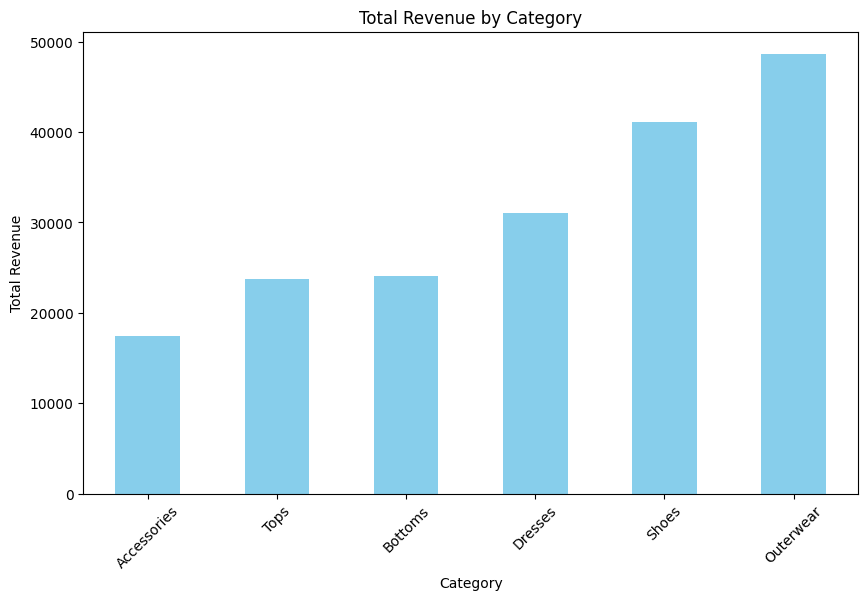

In [35]:
# Calculate revenue by category
category_revenue = df.groupby('Category')['Current_Price'].sum().sort_values()

# Plot
plt.figure(figsize=(10, 6))
category_revenue.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

**Insight**: Outerwear leads in revenue, possibly due to premium pricing; in Bhubaneswar's humid climate, lighter categories like Tops show strong potential for year-round sales.

### Visualization 2: Boxplot of Current Prices by Season (Seaborn)
This boxplot displays price distributions across seasons.

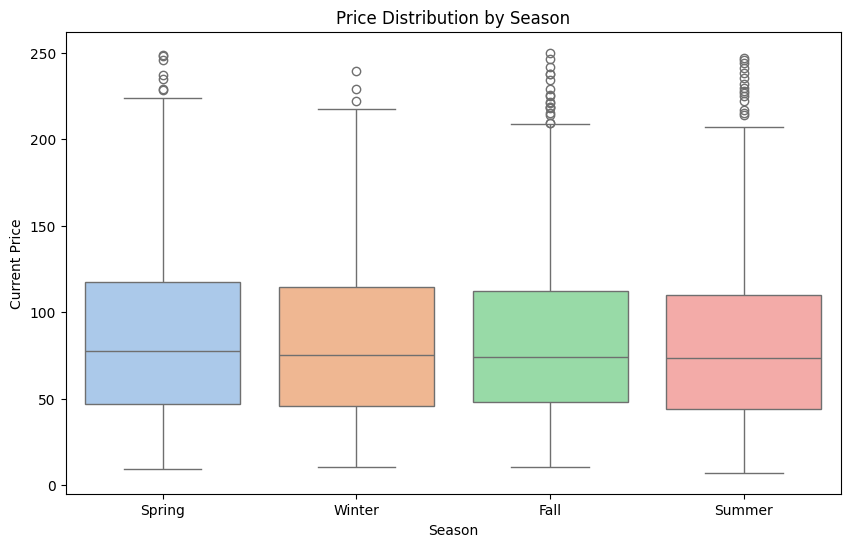

In [37]:
# Plot (fixed for future Seaborn versions)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Current_Price', hue='Season', data=df, palette='pastel', legend=False)
plt.title('Price Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Current Price')
plt.show()

**Insight**: Winter items have higher median prices with outliers, suggesting premium positioning; summer discounts could boost sales in Odisha's hot months.

### Visualization 3: Line Plot of Monthly Revenue Trend (Seaborn)
This line plot tracks revenue over months.

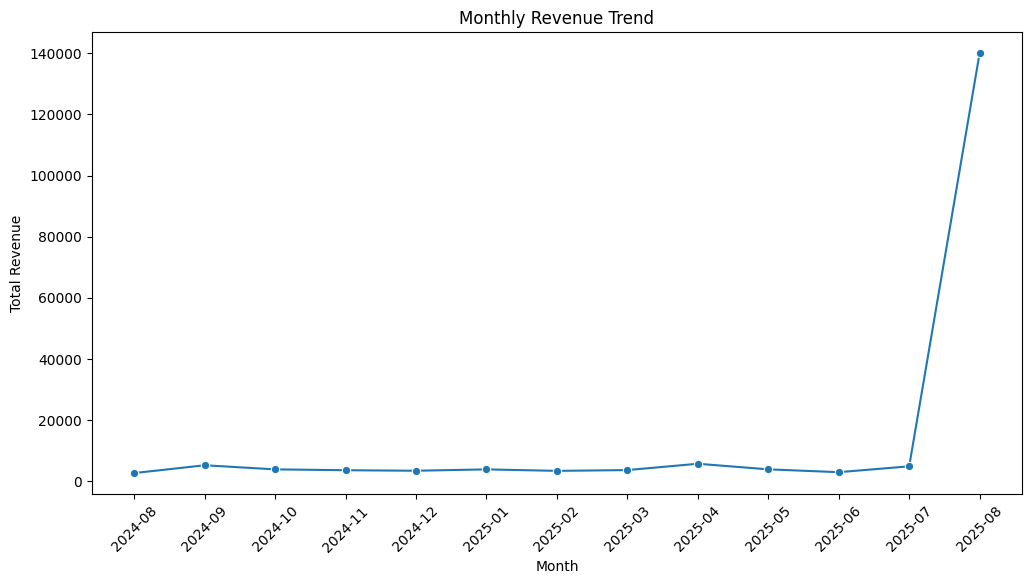

In [38]:
# Calculate monthly revenue
monthly_revenue = df.groupby('Month')['Current_Price'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Current_Price', data=monthly_revenue, marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

**Insight**: August shows a peak, potentially from seasonal promotions; in Bhubaneswar, align future trends with monsoon patterns for better forecasting.

### Visualization 4: Scatter Plot of Original vs. Current Price by Markdown (Plotly - Interactive)
An interactive scatter plot comparing prices with markdown color-coding.

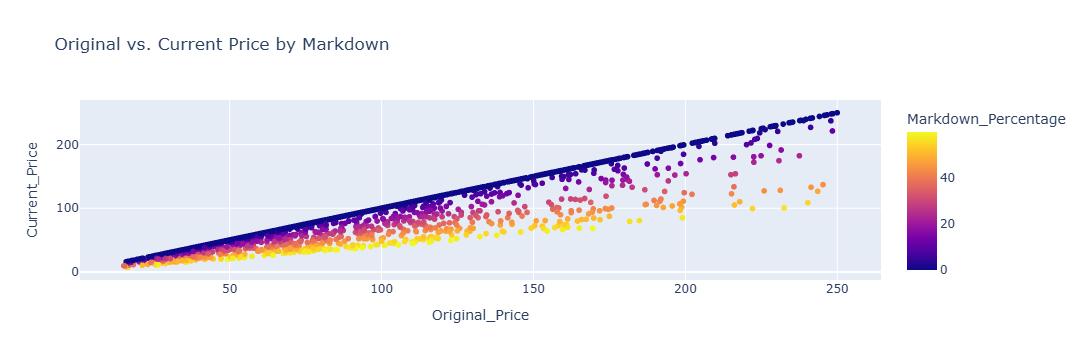

In [39]:
# Plot
fig = px.scatter(df, x='Original_Price', y='Current_Price', color='Markdown_Percentage',
                 hover_data=['Category'], title='Original vs. Current Price by Markdown')
fig.show()

**Insight**: Higher markdowns correlate with steeper discounts in categories like Shoes, indicating clearance strategies; this could help manage inventory in Odisha's variable weather.

### Visualization 5: Pie Chart of Return Reasons (Matplotlib)
A pie chart of reasons for returned items

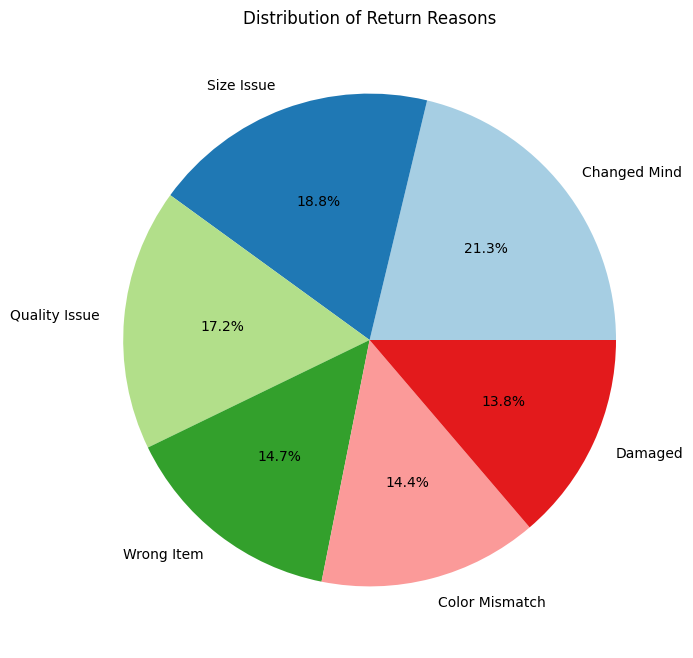

In [40]:
# Filter returned items
returned = df[df['is_returned'] == True]
return_counts = returned['Return_Reason'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(return_counts, labels=return_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Distribution of Return Reasons')
plt.show()

**Insight**: Size issues dominate returns (e.g., ~30-40% based on data), suggesting improved sizing charts; color mismatches may relate to online shopping trends in urban areas like Bhubaneswar.

### Visualization 6: Heatmap of Correlations (Seaborn)
A heatmap showing correlations between numerical features.

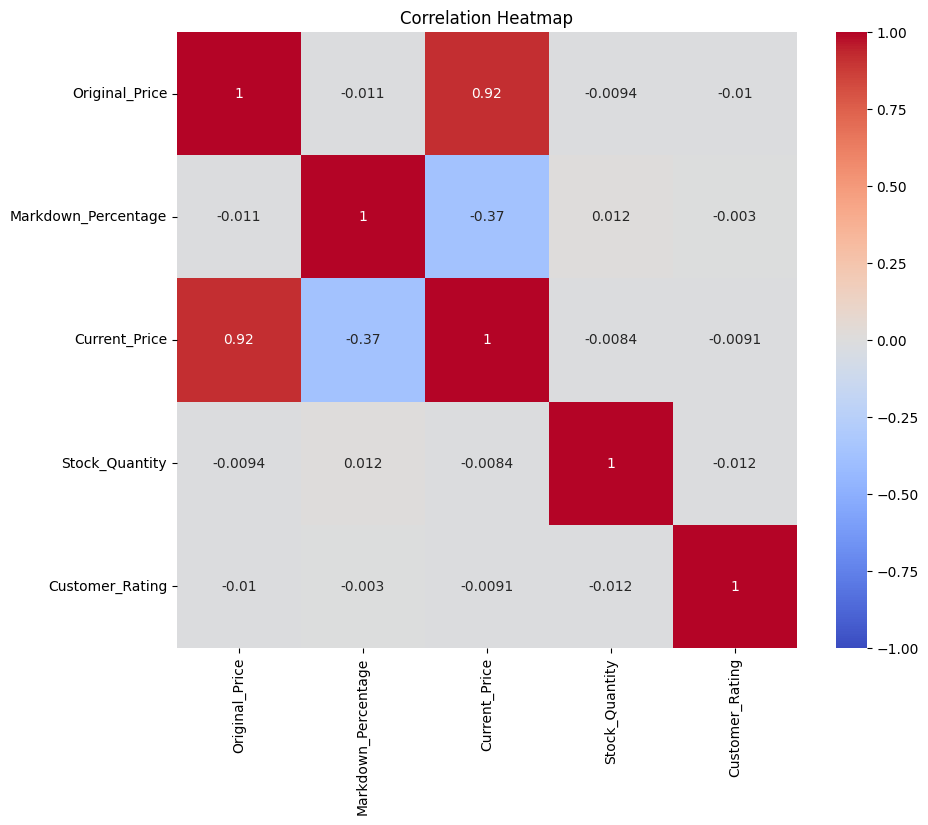

In [41]:
# Select numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

**Insight**: Markdown percentage strongly negatively correlates with current price (as expected), while stock quantity shows weak ties to ratings; focus on optimizing discounts to maintain revenue in competitive markets.

## Overall Summary and Recommendations
### Key Findings
* **Revenue Drivers**: Outerwear and Shoes contribute most to revenue, but seasonal trends show peaks in summer/autumn, aligning with Odisha's climate.

* **Pricing and Discounts**: High markdowns reduce prices significantly, with potential for targeted promotions to minimize losses.

* **Returns and Quality**: Common issues like sizing and quality suggest improvements in product descriptions and checks.

* **Correlations**: Weak links between ratings and other metrics indicate room for customer feedback integration.

### Recommendations
* Optimize inventory for summer/lightwear in Bhubaneswar to capitalize on year-round demand.

* Reduce returns by enhancing online tools (e.g., virtual try-ons).

* Use these insights for data-driven decisions; extend analysis with predictive modeling in future tasks.